In [145]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import newaxis

<!-- Latest compiled and minified CSS -->
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous">

<!-- Optional theme -->
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap-theme.min.css" integrity="sha384-rHyoN1iRsVXV4nD0JutlnGaslCJuC7uwjduW9SVrLvRYooPp2bWYgmgJQIXwl/Sp" crossorigin="anonymous">

<!-- Latest compiled and minified JavaScript -->
<script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js" integrity="sha384-Tc5IQib027qvyjSMfHjOMaLkfuWVxZxUPnCJA7l2mCWNIpG9mGCD8wGNIcPD7Txa" crossorigin="anonymous"></script>
<h2>1.1 Visualising the data </h2>

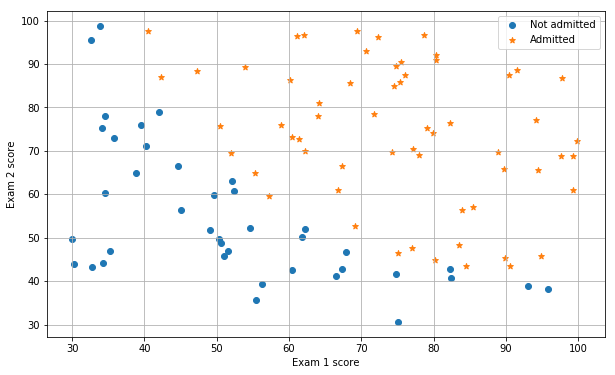

In [146]:
itemsMatrix = np.loadtxt("ex2data1.txt", delimiter=',', unpack=True)
x = itemsMatrix[:-1].T
y = itemsMatrix[-1][np.newaxis].T

m = y.size # number of training examples
n= x.shape[1] # number of features

theta = np.zeros((n,1))


admittionResults = itemsMatrix[2]

negativeIndices = admittionResults == 0
positiveIndices = admittionResults == 1

posx = itemsMatrix[:-1,positiveIndices] 
negx = itemsMatrix[:-1, negativeIndices]

fig, axes = plt.subplots(figsize=(10,6))
axes.scatter(negx[0], negx[1], marker='o', label='Not admitted')
axes.scatter(posx[0], posx[1], marker='*', label='Admitted')
axes.set_xlabel('Exam 1 score')
axes.set_ylabel('Exam 2 score')
axes.grid(True)
g = axes.legend() #g = garbage


<h2>1.2 Implementation </h2>
<h4>1.2.1 Warmup exercise: sigmoid function</h4>

In [147]:
from scipy.special import expit

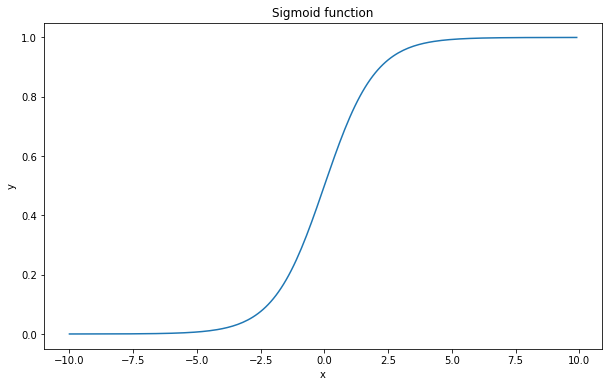

In [148]:
# I will use this function to calculate z = theta.dot(x)
#def oldHypothesis(featuresVector,theta):
#    return np.dot(theta,featuresVector)
#
#def h(z):
#    return 1/(1+np.exp(-z))

def h(x, theta):
    return expit(x.dot(theta))

fig, axes = plt.subplots(figsize = (10,6))

myx = np.arange(-10,10, .1)
axes.plot(myx, expit(myx))
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Sigmoid function')

<h4>1.2.2 Cost function and gradient </h4>

In [191]:
def J(x,y,theta):
    summationResult = 0
    firstPart = -np.sum((y*np.log(h(x,theta))))
    secondPart = np.sum((1-y)*np.log(1-h(x,theta)))
    summationResult += firstPart-secondPart
    result = (1/m)*summationResult
    return float(result) 

J(x,y,theta) #calculate initial cost

0.6931471805599453

<h4> 1.2.3 Learning parameters using fmin from scipy </h4>

In [150]:
from scipy import optimize

def optimizeTheta(theta,x,y):
    result = optimize.fmin(J,x0=theta, args=(x,y),maxiter = 400, full_output=True)
    return result[0],result[1]

theta, mincost = optimizeTheta(theta,x,y)



IndexError: too many indices for array